In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wows_shell import *

In [8]:
#height formulas by warabi99
def get_camera_angle(x):
    x_km = x/1000
    height = 1.1972*x_km*x_km + 14.595*x_km
    angle = np.arctan(height/x)
    return angle

def get_spotter_angle(x):
    x_km = x/1000
    height_km = 0.0075*x_km*x_km - 0.0427*x_km 
    height = height_km*1000
    angle = np.arctan(height/x)
    return angle


#s = shell(shellParams(.220, 985, .2549, 176.0, 2590, 7.0, .033, 37, 45, 60.0, 0), "Moskva")
#s = shell(shellParams(.460, 780, .292, 1460, 2574, 6, .033, 76, 45, 60, 0), "Yamato")
#s = shell(shellParams(.510, 765, .2964, 2620, 1800, 6, 0.033, 85, 45, 60, 0), "Satsuma")
s = shell(shellParams(.457, 810, .282, 1464, 2300, 6, 0.033, 76, 45, 60, 0), "Preussen")
c = shellCalc()
c.setMax(25)
c.calcImpactForwardEuler(s, addTraj=True) 

impact = s.getImpact()

distances = impact[int(impactIndices.distance), :]
camera_angles = np.degrees(get_camera_angle(distances))
spotter_angles = np.degrees(get_spotter_angle(distances))

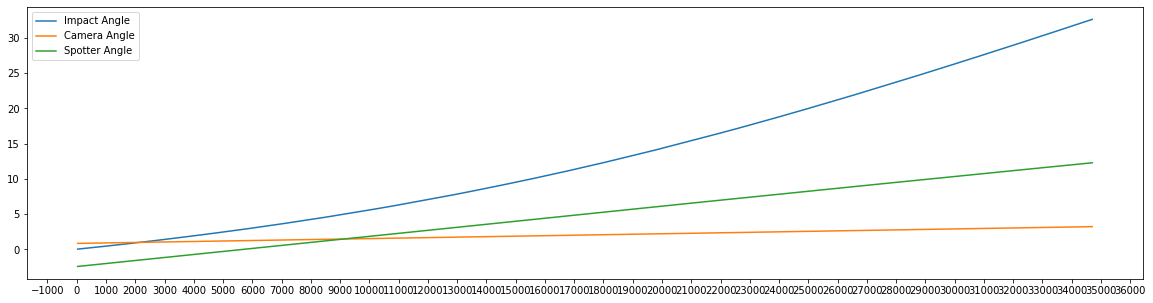

In [9]:
plt.rcParams['figure.figsize'] = [20, 5]

fig, ax = plt.subplots(1,1)

ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
#ax.set_xlim(0, 20000)
#ax.set_ylim(0, 4)

ax.plot(distances, impact[int(impactIndices.impactAngleHorizontalDegrees)])
ax.plot(distances, camera_angles)
ax.plot(distances, spotter_angles)

ax.legend(['Impact Angle', 'Camera Angle', 'Spotter Angle'])

plt.show()

In [10]:
sniper_vehicle_pos = np.array([25.193, 0, 213.275])
sniper_view = np.array([
    ((-417.286,            0, -733.665), ( 23.486, 42.8773, 217.663)),
    ((-327.837,            0, -541.508), ( 23.579, 33.0942, 217.865)),
    ((-258.758, -1.90735e-06, -390.335), (23.6671, 24.5167, 218.052)),
    ((-187.878,            0, -238.925), (23.7372,  16.762, 218.206)),
    ((-117.951,            0,  -88.317), (23.7996, 9.35015, 218.343)),
    ((-47.8324,            0,  63.4603), (23.8362, 3.97848, 218.421)),
    ((-5.72779,  1.19209e-07,  154.342), ( 23.847, 1.92603, 218.448)),
])
#print(sniper_view)

spotter_vehicle_pos = np.array([25.193, 0, 213.275])
spotter_view = np.array([
    ((-864.161,           0, -672.131), (-33.2555, 445.423, 160.555)),
    ((-690.788, 3.05176e-05, -484.556), (-22.0896, 355.345, 172.625)),
    ((-571.391,           0, -368.326), (0.157791, 235.716, 194.446)),
    ((-450.588,           0, -253.499), ( 14.2098, 137.398, 208.202)),
    ((-332.975,           0, -135.336), ( 21.1797, 66.5428, 215.134)),
    ((-213.871,           0, -18.7991), ( 23.7218,   23.84, 217.652)),
    ((-96.3798,           0,  98.8308), ( 24.2724,  5.1311, 218.194)),
    ((-25.3094,           0,  169.408), ( 24.3145, 2.11544, 218.231)),    
])
#print(spotter_view)

In [11]:
def generate_distance_angles(vehicle_pos, view_data):
    distance_bw = np.sqrt(np.sum(np.square(vehicle_pos - view_data[:,0,:]), axis=1))
    distance = distance_bw * 30

    y_diff_bw = view_data[:,1,1] - view_data[:,0,1]
    angle = np.degrees(np.arctan(y_diff_bw / distance_bw))

    return (distance, angle)

sniper_dist, sniper_angle = generate_distance_angles(sniper_vehicle_pos, sniper_view)
spotter_dist, spotter_angle = generate_distance_angles(spotter_vehicle_pos, spotter_view)

sniper_data = pd.DataFrame({'distance': sniper_dist, 'angle': sniper_angle})
spotter_data = pd.DataFrame({'distance': spotter_dist, 'angle': spotter_angle})

print(sniper_data)
print(spotter_data)


       distance     angle
0  31356.573890  2.349088
1  24997.895955  2.274386
2  20011.893520  2.104856
3  14996.522328  1.920510
4  10015.145794  1.604322
5   4999.943804  1.367456
6   1996.565644  1.657685
       distance      angle
0  37648.438081  19.541476
1  29993.952844  19.566058
2  24995.098980  15.796986
3  19995.523857  11.647967
4  14994.417327   7.583486
5   9995.448243   4.092685
6   5008.959827   1.760233
7   2006.819744   1.811305


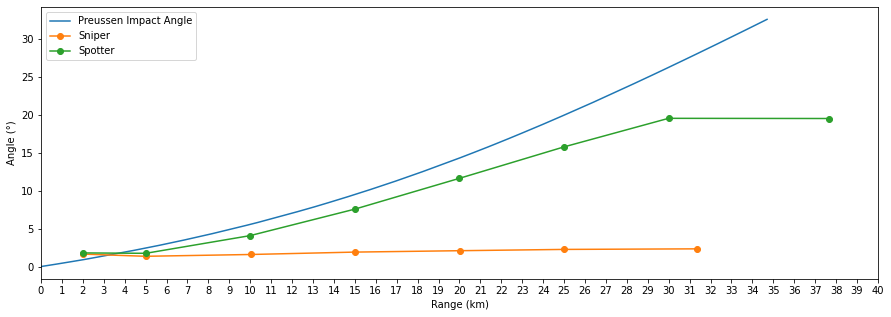

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]

fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))

ax.set_xlim(0, 40)
ax.set_xlabel('Range (km)')
ax.set_ylabel('Angle (°)')

ax.plot(distances/1000, impact[int(impactIndices.impactAngleHorizontalDegrees)], label='Preussen Impact Angle')
ax.plot(sniper_data['distance']/1000, sniper_data['angle'], marker='o', label='Sniper')
ax.plot(spotter_data['distance']/1000, spotter_data['angle'], marker='o', label='Spotter')

ax.legend()
plt.show()
